In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('D:\\Matchine_Learning\\CampusX\\tutorial\\day75_classification_matrics_confusion_matrix\\digit-recognizer\\train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


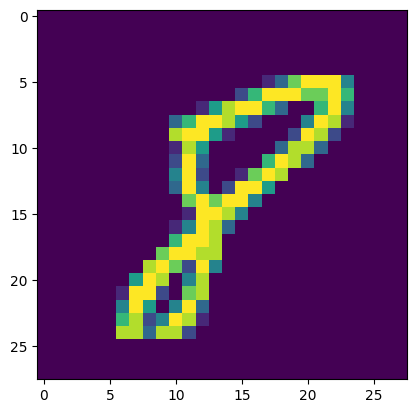

In [5]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306, 1:].values.reshape(28,28))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [9]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [10]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9145238095238095
Accuracy of Decision Trees 0.8503571428571428


In [12]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10)))

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,791,0,1,0,1,9,11,1,6,1
1,0,938,2,4,0,3,0,3,12,0
2,2,9,745,16,9,4,13,13,15,3
3,1,4,19,763,0,36,5,5,20,11
4,2,5,4,0,804,1,7,3,9,21
5,9,3,4,23,10,610,15,10,34,11
6,12,4,12,1,7,8,789,0,5,1
7,3,2,13,6,4,2,0,812,2,29
8,11,12,13,18,1,21,6,6,694,11
9,3,6,2,14,25,4,0,37,7,736


In [13]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,10)))

Decision Tree Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,755,2,9,5,8,19,6,3,9,5
1,0,901,11,9,6,4,4,6,17,4
2,10,27,656,36,20,16,15,18,26,5
3,10,12,34,688,8,40,10,14,28,20
4,6,5,9,6,730,7,10,12,23,48
5,14,8,14,41,14,573,17,8,22,18
6,9,1,11,6,11,24,756,1,15,5
7,3,8,23,15,7,4,1,783,8,21
8,9,12,24,32,19,35,11,11,621,19
9,10,4,10,16,47,17,5,25,20,680


* Multi-class Precision, Recall, F1 score matrix

In [14]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [15]:
precision_score(y_test,y_pred1,average='weighted')

0.9142150713630827

In [16]:
recall_score(y_test,y_pred1,average='weighted')

0.9145238095238095

In [17]:
f1_score(y_test,y_pred1,average='weighted')

0.9142794994052751

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       821
           1       0.95      0.98      0.96       962
           2       0.91      0.90      0.91       829
           3       0.90      0.88      0.89       864
           4       0.93      0.94      0.94       856
           5       0.87      0.84      0.85       729
           6       0.93      0.94      0.94       839
           7       0.91      0.93      0.92       873
           8       0.86      0.88      0.87       793
           9       0.89      0.88      0.89       834

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

